<a href="https://colab.research.google.com/github/oldistic/fishify/blob/machine-learning/FishiFy_CapstoneProejctV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pathlib

from google.colab import drive
drive.mount('/content/drive')

data_dir = "/content/drive/MyDrive/"
data_dir = pathlib.Path(data_dir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
%cd ./gdrive/My Drive/datasetnthn
!ls

[Errno 2] No such file or directory: './gdrive/My Drive/datasetnthn'
/content/drive/MyDrive/Capstone_dataset
dataset_TFRecord


In [27]:
file_path ="/content/drive/MyDrive/datasetnthn/"
class_names = sorted(os.listdir(file_path+'Training'))

for class_name in class_names:
    class_path = os.path.join(file_path+'Training', class_name)
    class_files = os.listdir(class_path)
    print(f'total training {class_name}', len(class_files))
    print(class_files[:5])
    print('\n=========================================================\n')

total training ikan_bawal 200
['bawal_62.jpg', 'bawal_44.jpg', 'bawal_39.jpg', 'bawal_38.jpg', 'bawal_70.jpg']


total training ikan_belut 200
['ikan_belut (14).jpg', 'ikan_belut (9).jpg', 'ikan_belut (34).jpg', 'ikan_belut (10).jpg', 'ikan_belut (33).jpg']


total training ikan_gurame 200
['ikan_gurame (16).jpg', 'ikan_gurame (49).jpg', 'ikan_gurame (80).jpg', 'ikan_gurame (61).jpg', 'ikan_gurame (14).jpg']


total training ikan_kakap 100
['kakap_50.jpg', 'kakap_87.jpg', 'kakap_62.jpg', 'kakap_75.jpg', 'kakap_14.jpg']


total training ikan_kembung 200
['ikan_kembung (98).jpg', 'ikan_kembung (11).jpg', 'ikan_kembung (92).jpg', 'ikan_kembung (4).jpg', 'ikan_kembung (14).jpg']


total training ikan_lele 203
['gsd.jpg', 'dfb.jpg', 'bcvu.jpg', 'ny.jpg', '543d.jpg']


total training ikan_mas 200
['ikan_mas (102).jpg', 'ikan_mas (100).jpg', 'ikan_mas (113).jpg', 'ikan_mas (87).jpg', 'ikan_mas (57).jpg']


total training ikan_mujair 199
['Mujair (67).jpg', 'Mujair (77).jpg', 'Mujair (62).jpg'

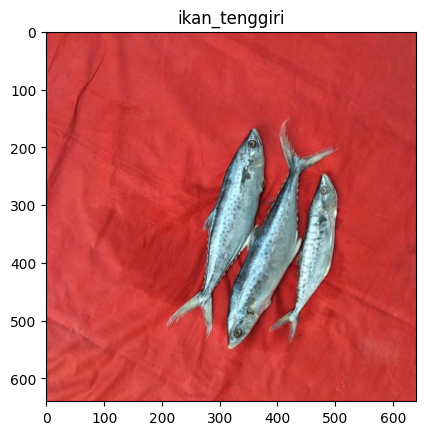

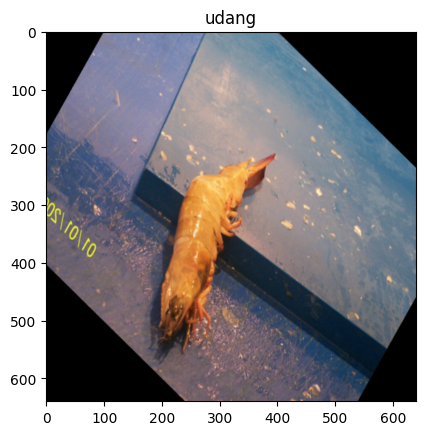

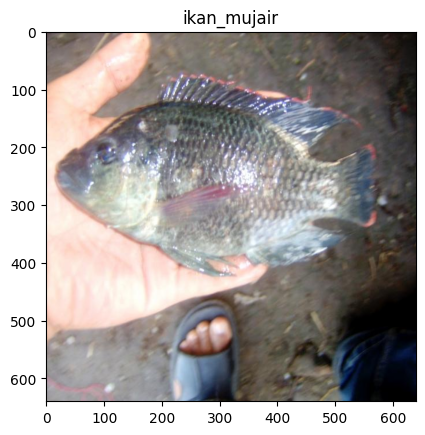

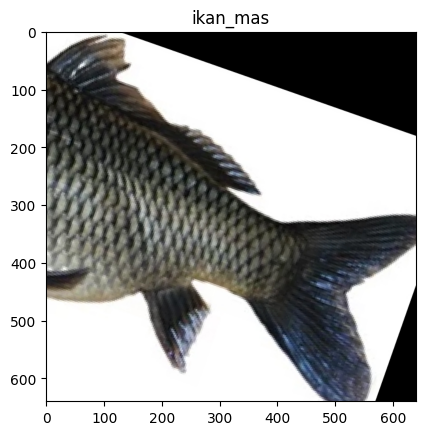

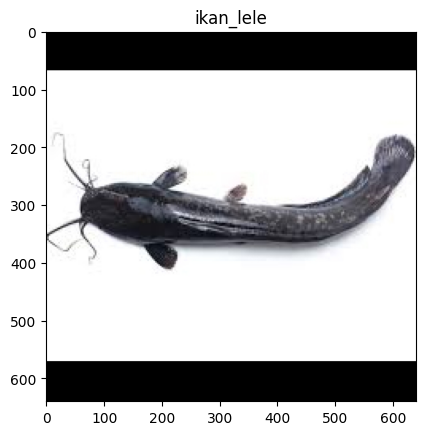

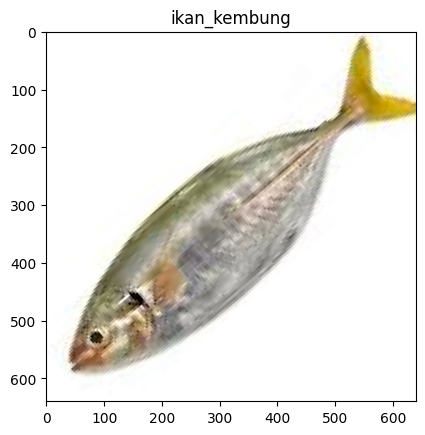

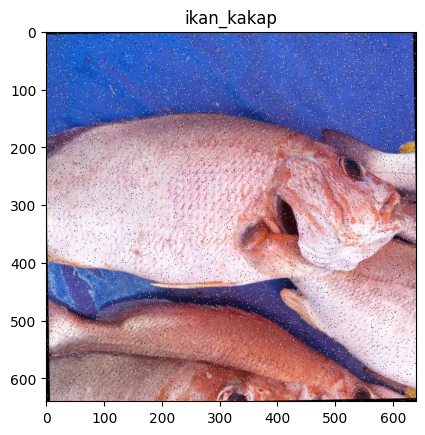

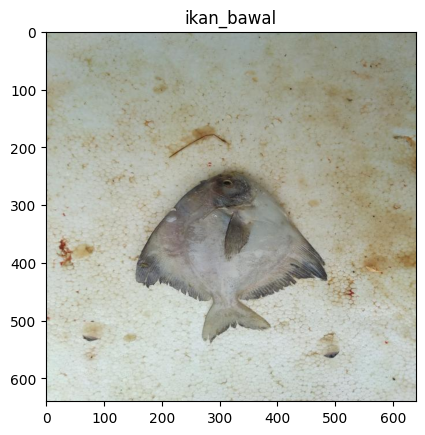

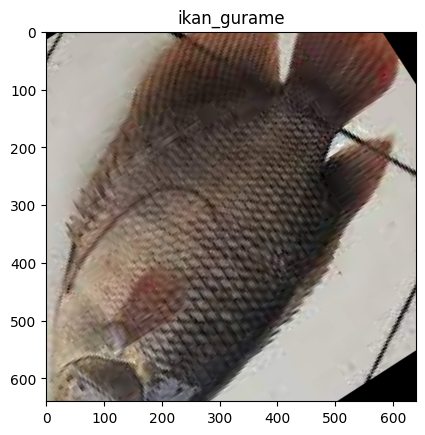

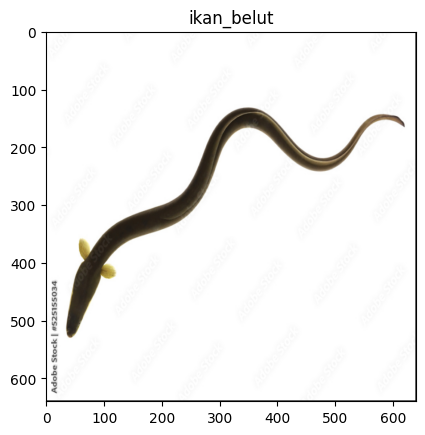

In [28]:
class_dirs = [d for d in os.listdir(file_path+'Training') if os.path.isdir(os.path.join(file_path+'Training', d))]

for class_dir in class_dirs:
    class_dir_path = os.path.join(file_path+'Training', class_dir)
    image_file = os.listdir(class_dir_path)[0]
    image_path = os.path.join(class_dir_path, image_file)

    # Muat dan tampilkan gambar
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(class_dir)
    plt.show()

In [29]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = file_path+"train/"
training_datagen = ImageDataGenerator(
      rescale = 1.0/255.)

VALIDATION_DIR = file_path+"valid/"
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(300,300),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(300,300),
    class_mode='categorical'
)

Found 1500 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [42]:
img_width, img_height = 300,300
batch_size = 52

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [43]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


for layer in base_model.layers[:100]:
    layer.trainable = False
for layer in base_model.layers[100:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
28/28 [==============================] - 12s 340ms/step - loss: 2.1960 - accuracy: 0.2197 - val_loss: 1.6510 - val_accuracy: 0.6771
Epoch 2/10
28/28 [==============================] - 8s 280ms/step - loss: 1.5732 - accuracy: 0.5112 - val_loss: 1.3069 - val_accuracy: 0.7083
Epoch 3/10
28/28 [==============================] - 9s 314ms/step - loss: 1.2172 - accuracy: 0.6480 - val_loss: 1.0029 - val_accuracy: 0.7812
Epoch 4/10
28/28 [==============================] - 8s 290ms/step - loss: 0.9926 - accuracy: 0.7220 - val_loss: 0.7612 - val_accuracy: 0.8646
Epoch 5/10
28/28 [==============================] - 10s 343ms/step - loss: 0.8673 - accuracy: 0.7679 - val_loss: 0.6992 - val_accuracy: 0.8646
Epoch 6/10
28/28 [==============================] - 7s 261ms/step - loss: 0.7329 - accuracy: 0.7960 - val_loss: 0.6328 - val_accuracy: 0.8542
Epoch 7/10
28/28 [==============================] - 9s 312ms/step - loss: 0.6477 - accuracy: 0.8173 - val_loss: 0.5040 - val_accuracy: 0.9062
Epoc

In [44]:
scores = model.evaluate(validation_generator)
scores = model.evaluate(train_generator)

47/47 [==============================] - 11s 226ms/step - loss: 0.1680 - accuracy: 0.9533


In [34]:
model.save('modelFishiFy.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


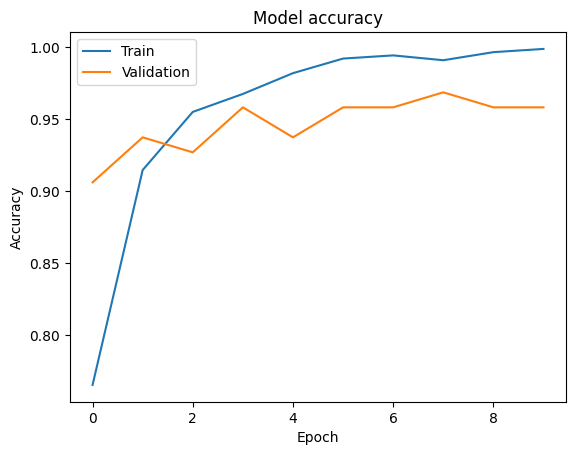

In [45]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

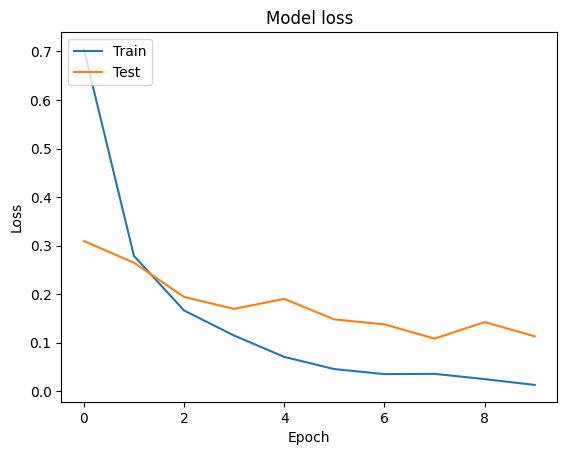

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Saving n5.jpg to n5.jpg
1/1 [==============================] - 0s 29ms/step


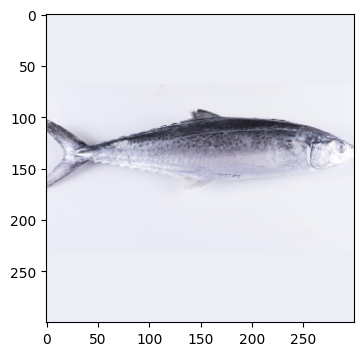

ikan-bawal: 0.00%
ikan-belut: 0.00%
ikan-gurame: 0.00%
ikan-kembung: 0.10%
ikan-lele: 0.01%
ikan-mas: 0.01%
ikan-nila: 0.03%
ikan-patin: 0.31%
ikan-tenggiri: 99.55%
udang: 0.00%


In [69]:
import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Mendapatkan label kelas
class_labels = list(train_generator.class_indices.keys())

# Mengunggah file
uploaded_files = files.upload()

# Melakukan prediksi untuk setiap file yang diunggah
for filename in uploaded_files.keys():
    # Membuka dan memproses gambar
    img_path = filename
    img = image.load_img(img_path, target_size=(300,300))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(img_array_expanded_dims)

    # Menumpuk gambar dan melakukan prediksi
    stacked_images = np.vstack([preprocessed_img])
    probabilities = model.predict(stacked_images)[0]

    # Menampilkan gambar dan probabilitas prediksi
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.show()
    for (class_label, probability) in zip(class_labels, probabilities):
        print(f"{class_label}: {probability * 100:.2f}%")


In [72]:
model = tf.keras.models.load_model('modelFishiFy.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('modelFishiFy.tflite', 'wb') as f:
    f.write(tflite_model)